In [13]:
%matplotlib inline
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pylab as plt
import numpy as np

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

(300, 2)


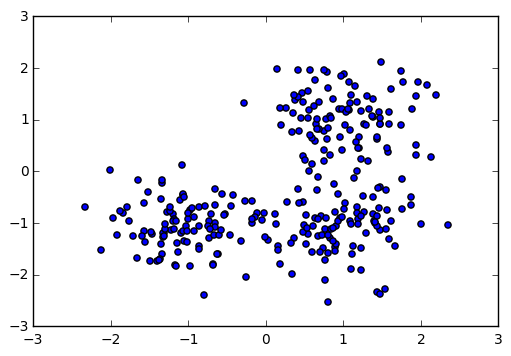

In [6]:
print X.shape
plt.scatter(X[:,0], X[:,1])

In [7]:
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [12]:
print cluster_centers_indices
print labels
print af.cluster_centers_
print af.affinity_matrix_.shape # the affinity matrix looks like a NxN dist matrix...
print af.affinity_matrix_

[160 250 272]
[0 1 2 0 0 2 1 1 2 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 2 1 2 2 1 0 2 1 2 2
 2 2 0 0 0 1 0 2 1 1 1 1 0 0 0 1 2 2 2 2 0 2 0 1 2 2 1 1 1 2 1 2 0 2 1 0 0
 1 1 2 2 0 1 2 0 1 2 2 0 0 1 1 0 2 0 2 0 2 0 2 1 0 1 0 0 1 0 0 2 2 1 2 2 2
 2 2 1 0 2 0 1 2 1 2 2 2 2 2 2 0 1 1 1 0 1 1 2 0 2 0 1 2 0 1 1 2 0 1 0 2 1
 2 2 2 0 0 0 2 0 2 0 0 0 0 1 2 0 1 1 1 2 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 2 1
 0 2 1 0 2 2 2 0 1 2 1 0 1 0 1 0 0 1 2 2 2 2 0 1 1 0 2 2 2 0 1 0 0 1 0 2 2
 0 2 1 1 1 0 0 2 1 1 1 2 1 0 2 2 0 2 2 1 0 1 1 0 0 1 0 1 1 1 2 0 1 1 0 2 2
 2 2 0 0 0 0 0 1 1 2 0 0 2 2 2 1 2 1 2 2 1 1 1 2 1 0 1 2 0 1 2 2 1 2 2 2 1
 0 2 1 1]
[[ 1.03325861  1.15123595]
 [ 0.93494652 -0.95302339]
 [-1.18459092 -1.11968959]]
(300, 300)
[[ -0.          -5.23166375 -14.49870744 ...,  -6.25586798  -1.21960696
  -10.26916615]
 [ -5.23166375  -0.          -2.33984579 ...,  -0.20087101  -1.81268874
   -4.61172606]
 [-14.49870744  -2.33984579  -0.         ...,  -1.81806691  -8.19805217
   -7.5978243 ]
 ..., 
 [ -6.255867

In [16]:
from sklearn.metrics import euclidean_distances
euclidean_distances(X)
# this seems to be the neg euclidean distance

array([[ 0.        ,  2.28728305,  3.80771683, ...,  2.50117332,
         1.10435816,  3.20455397],
       [ 2.28728305,  0.        ,  1.52965545, ...,  0.44818636,
         1.34636129,  2.14749297],
       [ 3.80771683,  1.52965545,  0.        , ...,  1.34835711,
         2.86322409,  2.75641512],
       ..., 
       [ 2.50117332,  0.44818636,  1.34835711, ...,  0.        ,
         1.6825765 ,  2.55741279],
       [ 1.10435816,  1.34636129,  2.86322409, ...,  1.6825765 ,
         0.        ,  2.18724989],
       [ 3.20455397,  2.14749297,  2.75641512, ...,  2.55741279,
         2.18724989,  0.        ]])

In [17]:
n_clusters_ = len(cluster_centers_indices)
## Notice how we didn't specify # of clusters

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


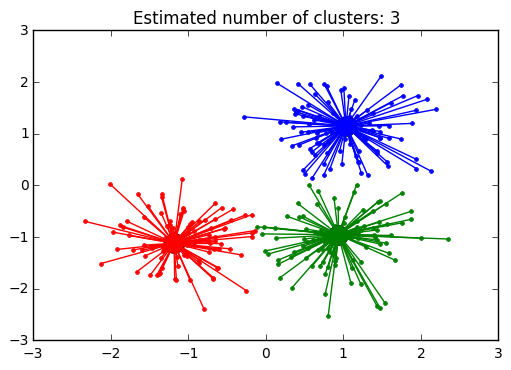

In [22]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)